# Supervised Learning 

## Graduate Admission Chances

----

#### Dataset source : Kaggle [https://www.kaggle.com/mohansacharya/graduate-admissions]


#### Topics
----

  1. Exploratory Data Analysis
  2. Linear Regression
  3. Logistic Regression
  4. KNN

###### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("graduate_admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


###### Check for Missing Data 

In [3]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None
(500, 9)


We have 500 records with 9 numerical parameters with no missing data

###### More about the data

In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

#### Visualizations

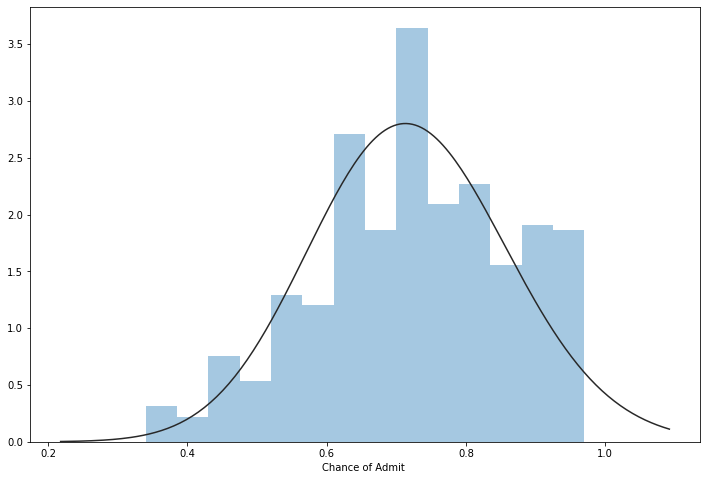

In [6]:
from scipy import stats
sns.distplot(df['Chance of Admit '],kde=False,fit=stats.gamma)

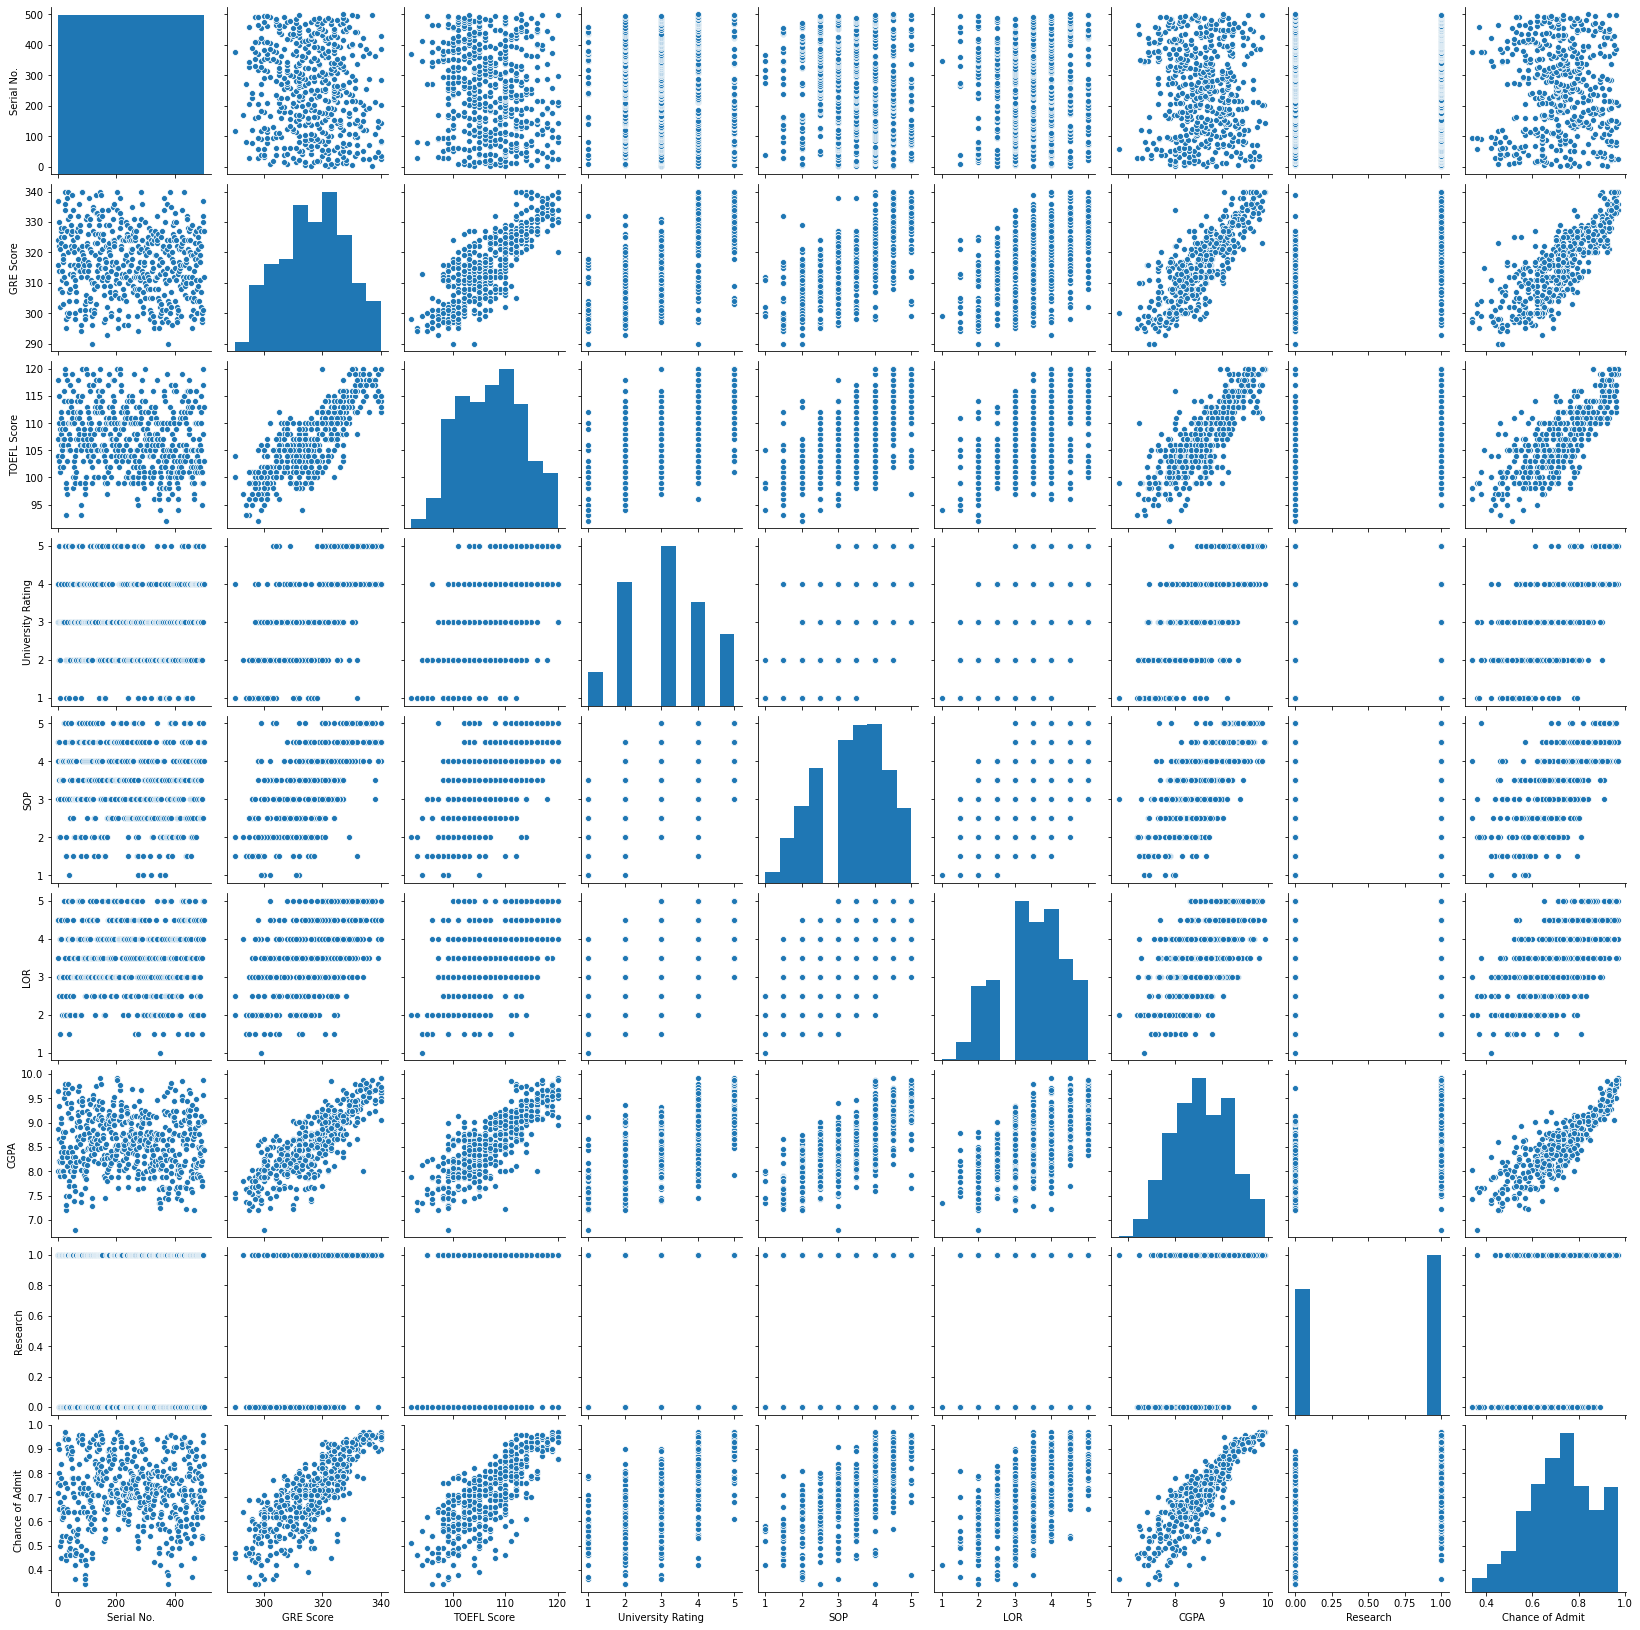

In [7]:
sns.pairplot(df)

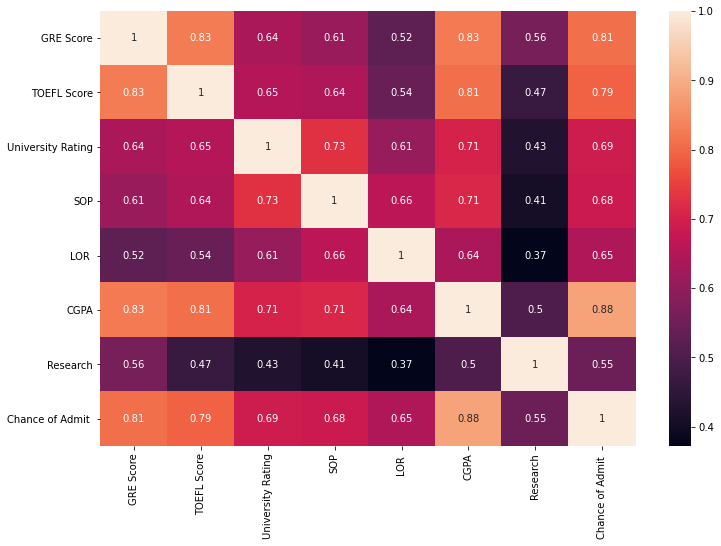

In [8]:
sns.heatmap(df.drop(['Serial No.'],axis=1).corr(),annot=True)

#### ML Model Training and Testing

###### Importing Libraries and Splitting Train/Test Data

In [9]:
from sklearn.linear_model import LinearRegression

#Train-test split and metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [10]:
#Split Training and Test Data
X = df.drop('Chance of Admit ',axis=1)
y = np.array(df['Chance of Admit ']).reshape(-1,1)

print(X.shape)
print(y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

(500, 8)
(500, 1)


## Regression

### Linear Regression
---

In [11]:
reg = LinearRegression()
reg.fit(X_train,y_train)

#
yp_test = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,yp_test))).round(2)
r2 = round(reg.score(X_test,y_test),2)

print("Model performance on Test set")
print("----------------------------------")
print("RMSE is {} ".format(rmse))
print("R^2 score is {}".format(r2))
print("\n")


Model performance on Test set
----------------------------------
RMSE is 0.06 
R^2 score is 0.82




#### Regularization

<ul>
    <li>Ridge - L2 Reg.  =>    Prevents overfitting</li>
    <li>Lasso - L1 Reg.  =>    Can be used to select important features
</ul>

##### Ridge Regression
---

In [12]:
from sklearn.linear_model import Ridge

#Low alpha -> resembles linear reg
rr = Ridge(alpha=0.01)
rr.fit(X_train,y_train)

#High alpha -> less overfitting
rr100 = Ridge(alpha=100)
rr100.fit(X_train,y_train)

Ridge(alpha=100)

In [13]:
rr_score = rr.score(X_test,y_test)
rr100_score = rr100.score(X_test,y_test)

print("Alpha \t R^2 Score")
print("0.01 \t {}".format(rr_score.round(2)))
print("100 \t {}".format(rr100_score.round(2)))

Alpha 	 R^2 Score
0.01 	 0.82
100 	 0.79


##### Lasso Regression
---

In [14]:
from sklearn.linear_model import Lasso

#Default Alpha = 1
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_score = lasso.score(X_test,y_test)

#Alpha = 0.1
lasso_01 = Lasso(alpha=0.1)
lasso_01.fit(X_train,y_train)
lasso01_score = lasso_01.score(X_test,y_test)

#Alpha = 0.0001
lasso_0001 = Lasso(alpha=0.0001)
lasso_0001.fit(X_train,y_train)
lasso0001_score = lasso_0001.score(X_test,y_test)


print("Alpha \t R^2 Score")
print("1 \t {}".format(lasso_score.round(2)))
print("0.1 \t {}".format(lasso01_score.round(2)))
print("0.0001 \t {}".format(lasso0001_score.round(2)))

Alpha 	 R^2 Score
1 	 0.28
0.1 	 0.7
0.0001 	 0.82


###### Plotting Coefficient Magnitude of Lasso Models with different values of alpha

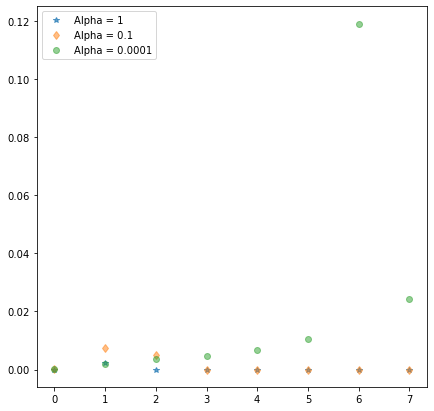

In [15]:
plt.figure(figsize=(7,7))
plt.plot(lasso.coef_,alpha=0.7,marker='*',linestyle='none',label='Alpha = 1')
plt.plot(lasso_01.coef_,alpha=0.5,marker='d',linestyle='none',label='Alpha = 0.1')
plt.plot(lasso_0001.coef_,alpha=0.5,marker='o',linestyle='none',label='Alpha = 0.0001')
plt.legend()

 * We can see that for low value of alpha (0.0001), it resembles with linear regression with many coefficients having non-zero magnitude
 * For Alpha = 0.1 and Alpha = 1 most coefficients have zero magnitude
    * most coefficients have zero magniture
    * Parameter 1 and Parameter 2 have the highest magnitude, thus indicating that the features 'GRE Score' and 'TOEFL Score' are the most important features

#### Cross Validation

In [16]:
cv_result = cross_val_score(reg,X,y,cv=5)
print('CV Scores : ',cv_result)
print('CV Score Average : ',np.mean(cv_result))

CV Scores :  [0.67137972 0.7725973  0.86084156 0.83093238 0.81542346]
CV Score Average :  0.7902348853116391


### Logistic Regression
---

###### Convert Chance of Admission from numerical to categorical value
<table align='left'>
    <tr>
        <th>Chance of Admission</th>
        <th>Label</th>
    </tr>
    <tr>
        <td> 1.00 - 0.76 </td>
        <td> High </td>
    </tr>
    <tr>
        <td> 0.75 - 0.51 </td>
        <td> Medium </td>
    </tr>
    <tr>
        <td> 0.50 and below </td>
        <td> Low </td>
    </tr>


In [17]:
bins = [0,0.50,0.75,1.00]
lbls = ['Low','Medium','High']

df['Chance'] = pd.cut(df['Chance of Admit '],bins,labels=lbls)
df.drop(['Chance of Admit '],axis=1)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,High
1,2,324,107,4,4.0,4.5,8.87,1,High
2,3,316,104,3,3.0,3.5,8.00,1,Medium
3,4,322,110,3,3.5,2.5,8.67,1,High
4,5,314,103,2,2.0,3.0,8.21,0,Medium
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,High
496,497,337,117,5,5.0,5.0,9.87,1,High
497,498,330,120,5,4.5,5.0,9.56,1,High
498,499,312,103,4,4.0,5.0,8.43,0,Medium


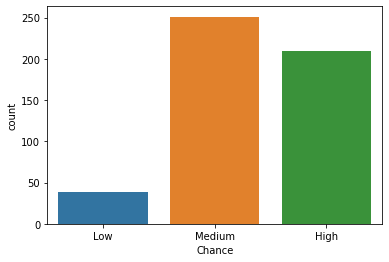

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(df['Chance'])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


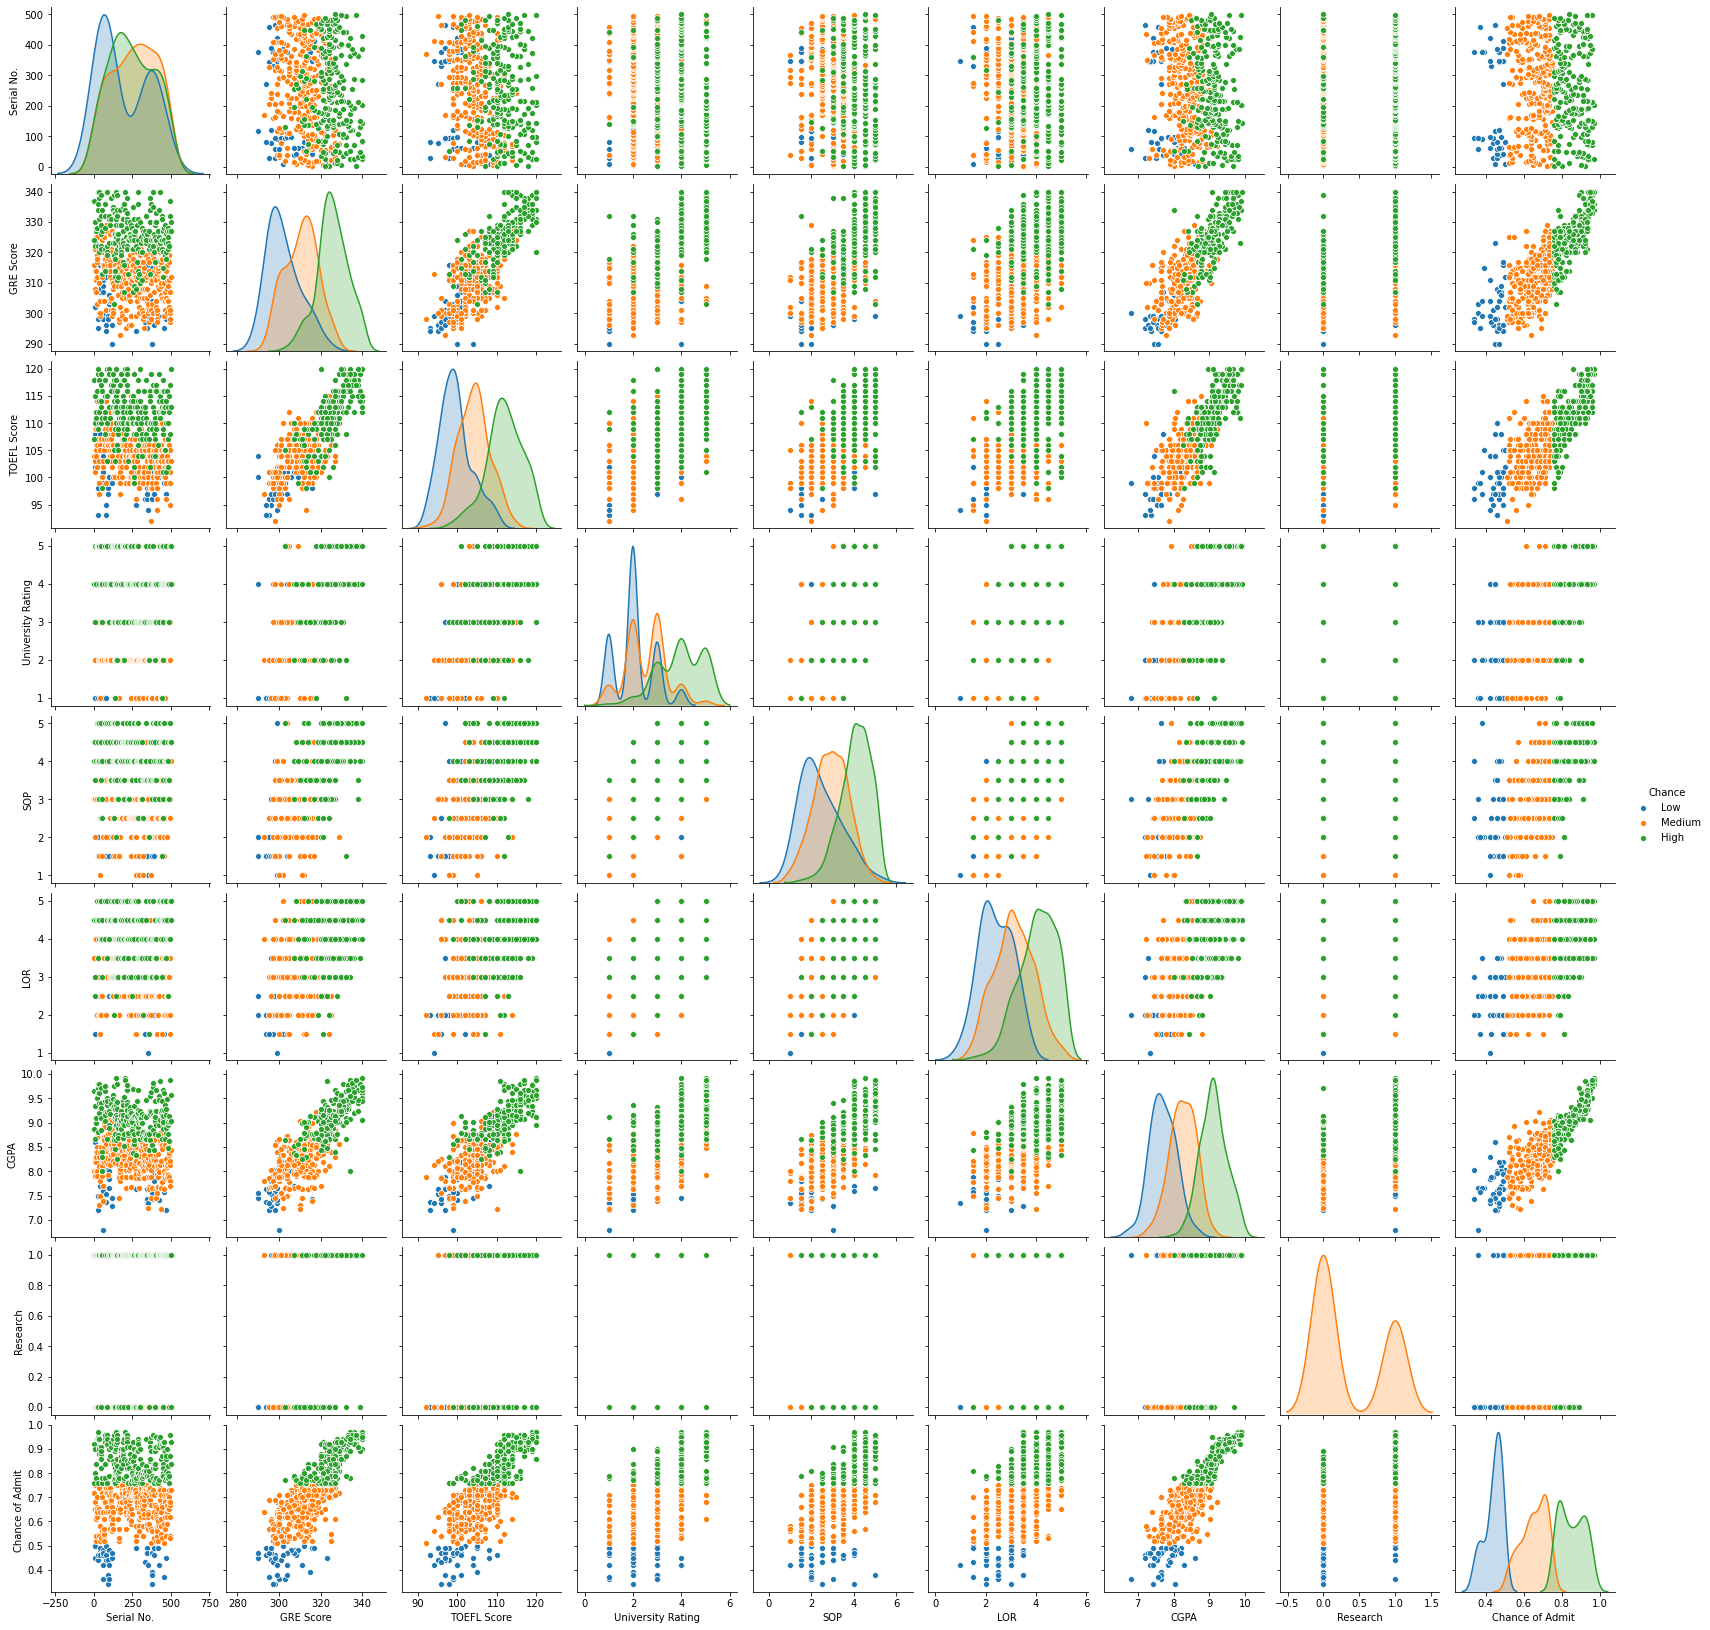

In [19]:
sns.pairplot(df,hue='Chance')

###### Creating a logisitc regression model to check if a record has high chance of admission

In [20]:
X = df.drop('Chance',axis=1)
y = np.array(df['Chance'])

print(X.shape)
print(y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

(500, 9)
(500,)


In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train)
log_reg_score = log_reg.score(X_test,y_test)

print("R^2 Score for Logisitc Regression {}".format(log_reg_score))

R^2 Score for Logisitc Regression 0.84


###### Plotting ROC Curve for each class

In [22]:
from sklearn.metrics import roc_curve

#Computing ROC for each class
yp = log_reg.predict(X_test)
pred_y = log_reg.predict_proba(X_test)
y_test_dummies = pd.get_dummies(y_test,drop_first=False).values

fpr = dict()
tpr = dict()
thresholds = dict()

for i in range(3):
    fpr[i],tpr[i],thresholds[i] = roc_curve(y_test_dummies[:,i],pred_y[:,i])
    

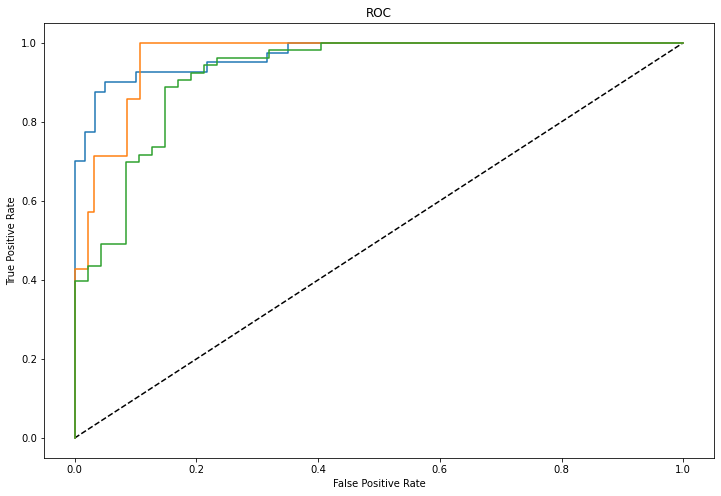

In [23]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr[0],tpr[0])
plt.plot(fpr[1],tpr[1])
plt.plot(fpr[2],tpr[2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### KNN

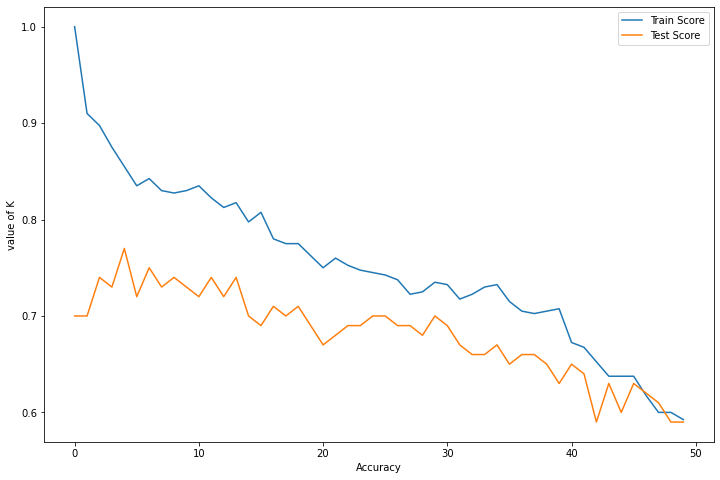

In [24]:
from sklearn.neighbors import KNeighborsClassifier
train_acc = []
test_acc = []

for i in range(50):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train,y_train)
    
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))
    
    

plt.plot(np.arange(50),train_acc,label='Train Score')    
plt.plot(np.arange(50),test_acc,label='Test Score')
plt.xlabel('Accuracy')
plt.ylabel("value of K")
plt.legend()
plt.show()


#### Results

In [25]:
print("Best Test Case Accuracy : {} ".format(np.max(test_acc)))
print("Value of K = {} ".format(test_acc.index(np.max(test_acc)) + 1))

Best Test Case Accuracy : 0.77 
Value of K = 5 


## Results

----

<table>
    <tr>
        <th>Name</th>
        <th>Score</th>
    </tr>
    <tr>
        <td> Linear Regression </td>
        <td>0.82</td>
    </tr>
    <tr>
        <td> Ridge Regression </td>
        <td>0.79</td>
    </tr>
    <tr>
        <td> Lasso Regression </td>
        <td>0.7</td>
    </tr>
    <tr>
        <td> Logistic Regression </td>
        <td>0.84</td>
    </tr>
    <tr>
        <td> KNN</td>
        <td>0.77</td>
    </tr>
</table>